In [25]:
import numpy as np
import pandas as pd
import prince
from scipy import stats
import os
from ydata_profiling import ProfileReport
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
ahs = pd.read_csv('ahs_cleaned-1.csv', na_values=[-6, "'-9'"])

In [27]:
profile = ProfileReport(ahs, 
                       title = 'American Housing Survey EDA',
                       html = {'style': {'full_width': True}},
                       minimal = False)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
ahs['HINCP']

0        257000.0
1        201000.0
2             NaN
3         66900.0
4         35000.0
           ...   
63180     74000.0
63181    207000.0
63182    158100.0
63183    130200.0
63184    120000.0
Name: HINCP, Length: 63185, dtype: float64

In [30]:
ahs['RODENT'].value_counts()

RODENT
No signs in the last 12 months            48821
Seen a few times in the last 12 months     4212
Seen monthly in the last 12 months          522
Seen daily in the last 12 months            474
Seen weekly in the last 12 months           426
Name: count, dtype: int64

In [31]:
ahs.groupby("RODENT").agg({'HINCP':'mean'})

HINCP
RODENT                                              
No signs in the last 12 months          87738.246779
Seen a few times in the last 12 months  86156.387464
Seen daily in the last 12 months        51274.924051
Seen monthly in the last 12 months      82798.544061
Seen weekly in the last 12 months       64086.826291

In [32]:
stats.f_oneway(ahs.query("RODENT=='No signs in the last 12 months'").HINCP.dropna(),
              ahs.query("RODENT=='Seen a few times in the last 12 months'").HINCP.dropna(),
              ahs.query("RODENT=='Seen daily in the last 12 months'").HINCP.dropna(),
              ahs.query("RODENT=='Seen monthly in the last 12 months'").HINCP.dropna(),
              ahs.query("RODENT=='Seen weekly in the last 12 months'").HINCP.dropna())

F_onewayResult(statistic=21.68467615110672, pvalue=6.703833330074091e-18)

In [33]:
ahs['YRBUILT'].value_counts()

YRBUILT
1970    9313
1980    9072
2000    8883
1990    7863
1960    6860
1950    6330
1919    3594
1940    3001
1920    2494
1930    1699
2010     846
2017     503
2016     489
2015     486
2014     444
2013     340
2012     320
2018     269
2011     251
2019     128
Name: count, dtype: int64

In [34]:
ahs['MARKETVAL'].describe()

count    3.839000e+04
mean     3.762769e+05
std      5.537866e+05
min      1.000000e+03
25%      1.404465e+05
50%      2.552730e+05
75%      4.359682e+05
max      9.999998e+06
Name: MARKETVAL, dtype: float64

In [35]:
ahs[['MARKETVAL', 'YRBUILT']].corr()

MARKETVAL  YRBUILT
MARKETVAL    1.00000 -0.00403
YRBUILT     -0.00403  1.00000

In [36]:
ahs2 = ahs[['MARKETVAL', 'YRBUILT']].dropna()
stats.pearsonr(ahs2['MARKETVAL'], ahs2['YRBUILT'])

PearsonRResult(statistic=-0.004029500232993756, pvalue=0.4298243664117505)

In [37]:
ahs.columns

Index(['Unnamed: 0', 'DIVISION', 'TENURE', 'YRBUILT', 'UNITSIZE', 'HSHLDTYPE',
       'HHRACE', 'HHSEX', 'HINCP', 'TOTHCAMT', 'MARKETVAL', 'MAINTAMT',
       'FUSEBLOW', 'SEWBREAK', 'ROACH', 'RODENT', 'NOWIRE', 'PLUGS', 'COLD',
       'NOTOIL', 'NOWAT', 'FLOORHOLE', 'FNDCRUMB', 'PAINTPEEL', 'ROOFHOLE',
       'ROOFSAG', 'ROOFSHIN', 'WALLCRACK', 'WALLSIDE', 'WALLSLOPE', 'WINBOARD',
       'WINBROKE', 'LEAKI', 'MOLDBATH'],
      dtype='object')

In [38]:
broken = ahs[['FUSEBLOW', 'SEWBREAK', 'ROACH', 'RODENT', 'NOWIRE', 'PLUGS', 'COLD',
       'NOTOIL', 'NOWAT', 'FLOORHOLE', 'FNDCRUMB', 'PAINTPEEL', 'ROOFHOLE',
       'ROOFSAG', 'ROOFSHIN', 'WALLCRACK', 'WALLSIDE', 'WALLSLOPE', 'WINBOARD',
       'WINBROKE', 'LEAKI', 'MOLDBATH']].dropna()

In [39]:
MCA = prince.MCA(n_components=2)
MCA = MCA.fit(broken)

In [40]:
pd.set_option('display.max_rows', 100)
MCA.column_coordinates(broken).sort_values(1)

0         1
WALLSLOPE_Broken                                    4.859635 -2.950850
ROOFSAG_Broken                                      3.902603 -2.081117
ROOFHOLE_Broken                                     4.146928 -1.846733
WINBOARD_Broken                                     3.453465 -1.520681
ROOFSHIN_Broken                                     2.383509 -1.414448
WALLSIDE_Broken                                     3.081928 -1.376421
WINBROKE_Broken                                     2.177905 -0.682508
FNDCRUMB_Broken                                     1.821285 -0.329732
LEAKI_Not broken                                   -0.080363 -0.094509
ROACH_Seen daily in the last 12 months              2.536513 -0.090333
FUSEBLOW_No fuses / breakers blown in the last ... -0.071365 -0.068008
RODENT_No signs in the last 12 months              -0.115875 -0.058268
COLD_Not broken                                    -0.083473 -0.056805
NOTOIL_Not broken                                  -0.024595 -0.054527
NOWAT_Not broken                                   -0.022931 -0.051497
SEWBREAK_No breakdowns in the last 3 months        -0.024639 -0.049381
NOWIRE_Broken                                       0.685452 -0.044776
ROACH_No signs in the last 12 months               -0.080401 -0.018008
WALLCRACK_Not broken                               -0.109387 -0.017515
MOLDBATH_Not broken                                -0.032766 -0.012466
FLOORHOLE_Not broken                               -0.042144 -0.001168
PLUGS_Not broken                                   -0.018019 -0.000918
PAINTPEEL_Not broken                               -0.059398 -0.000881
NOWIRE_Not broken                                  -0.017618  0.001151
WINBOARD_Not broken                                -0.031695  0.013956
FNDCRUMB_Not broken                                -0.092293  0.016709
ROACH_Seen a few times in the last 12 months        0.343733  0.021521
WINBROKE_Not broken                                -0.076223  0.023887
ROOFHOLE_Not broken                                -0.054294  0.024179
WALLSLOPE_Not broken                               -0.046273  0.028098
ROOFSAG_Not broken                                 -0.060364  0.032190
WALLSIDE_Not broken                                -0.072108  0.032204
ROOFSHIN_Not broken                                -0.076179  0.045207
PAINTPEEL_Broken                                    3.404734  0.050471
PLUGS_Broken                                        1.027686  0.052360
FLOORHOLE_Broken                                    4.283977  0.118711
RODENT_Seen monthly in the last 12 months           1.356884  0.174086
WALLCRACK_Broken                                    2.236686  0.358129
RODENT_Seen a few times in the last 12 months       0.580356  0.396360
ROACH_Seen monthly in the last 12 months            0.917774  0.552931
FUSEBLOW_1 fuse / breaker blown in the last 3 m...  0.660562  0.580834
ROACH_Seen weekly in the last 12 months             1.212555  0.718176
FUSEBLOW_2 fuses / breakers blown in the last 3...  0.752376  0.756036
RODENT_Seen weekly in the last 12 months            1.927029  0.853665
COLD_Broken                                         1.363439  0.927835
RODENT_Seen daily in the last 12 months             3.184854  1.114071
FUSEBLOW_3 fuses / breakers blown in the last 3...  1.296718  1.166642
MOLDBATH_Broken                                     3.340396  1.270833
LEAKI_Broken                                        1.118394  1.315263
FUSEBLOW_4 or more fuses / breakers blown in th...  1.584203  1.714642
SEWBREAK_Two breakdowns in the last 3 months fo...  3.190872  2.227685
NOWAT_Broken                                        1.089688  2.447171
SEWBREAK_Sewage system broke down in the last 3...  0.679710  2.959849
SEWBREAK_Four or more breakdowns in last three ...  5.443660  3.332100
NOTOIL_Broken                                       2.186906  4.848332
SEWBREAK_One breakdown in the last 3 months for...  1.532909  5.796849
SEWBREAK_Thr

In [41]:
indices = MCA.row_coordinates(broken).reset_index()
indices = indices.rename({0:'brokenness', 
                          1:'structure_infrastructure'},
                        axis=1)

In [42]:
ahs_merge = pd.merge(ahs.reset_index(), indices,
                    how = 'outer',
                    on = 'index',
                    validate = 'one_to_one')

# Brokenness by marketvalue

In [44]:
ahs_merge[['brokenness', 'MARKETVAL']]

brokenness  MARKETVAL
0       -0.159316   280249.0
1       -0.159316  1000270.0
2             NaN    96118.0
3       -0.073491   198510.0
4             NaN        NaN
...           ...        ...
63180   -0.159316   925211.0
63181   -0.107032   372363.0
63182   -0.159316   257198.0
63183   -0.159316   510021.0
63184   -0.159316   440376.0

[63185 rows x 2 columns]

<Axes: title={'center': 'Home Repair and Market Value'}, xlabel='Brokenness Index', ylabel='Market Value'>

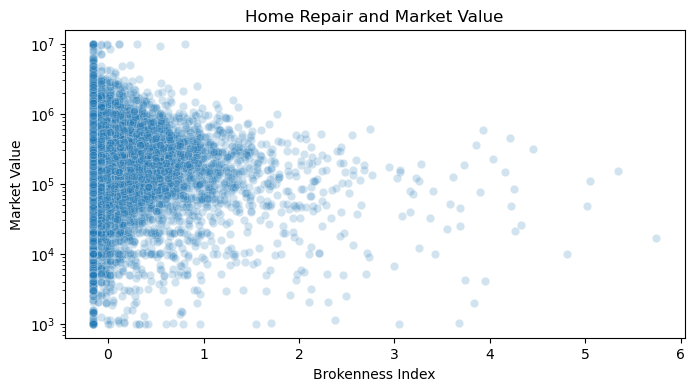

In [53]:
fig, ax = plt.subplots(figsize = (8,4))
ax.set(ylabel = 'Market Value')
ax.set(xlabel = 'Brokenness Index')
ax.set(yscale = 'log')
ax.set(title = 'Home Repair and Market Value')
sns.scatterplot(ahs_merge, x='brokenness', y='MARKETVAL', alpha = 0.2)

In [ ]:
ahs_merge2 = ahs_merge.query()
ahs_merge['brokenness'].min

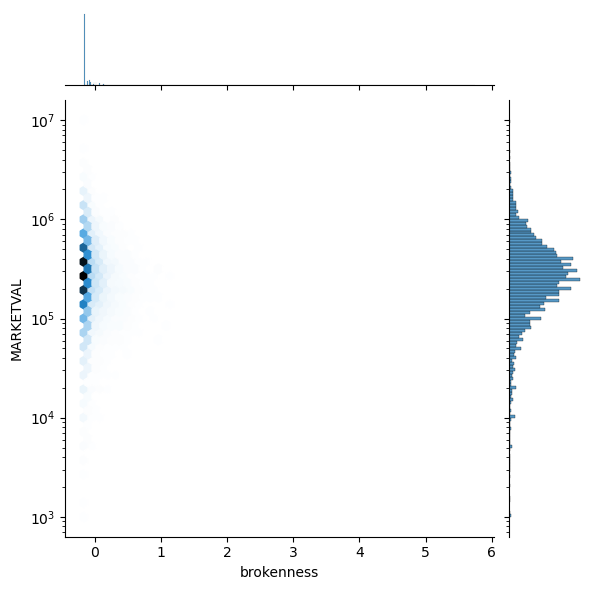

In [58]:
sns.jointplot(ahs_merge, x='brokenness', y='MARKETVAL', kind = 'hex', yscale = 'log')

# Are of the country eith most squatters

In [59]:
ahs_merge[['DIVISION', 'TENURE']]

DIVISION                                             TENURE
0          South Atlantic  Owned or being bought by someone in your house...
1             New England  Owned or being bought by someone in your house...
2      West South Central                                                NaN
3      West South Central  Owned or being bought by someone in your house...
4      West North Central                                             Rented
...                   ...                                                ...
63180  East North Central  Owned or being bought by someone in your house...
63181      South Atlantic  Owned or being bought by someone in your house...
63182      South Atlantic  Owned or being bought by someone in your house...
63183      South Atlantic  Owned or being bought by someone in your house...
63184      South Atlantic  Owned or being bought by someone in your house...

[63185 rows x 2 columns]

In [61]:
round(100*pd.crosstab(ahs_merge['DIVISION'], ahs_merge['TENURE'], normalize = 'index'), 2)

TENURE              Occupied without payment of rent  \
DIVISION                                               
East North Central                              1.18   
East South Central                              2.59   
Middle Atlantic                                 1.14   
Mountain                                        1.30   
New England                                     1.15   
Pacific                                         1.05   
South Atlantic                                  1.63   
West North Central                              1.37   
West South Central                              1.50   

TENURE              Owned or being bought by someone in your household  Rented  
DIVISION                                                                        
East North Central                                              66.55    32.27  
East South Central                                              59.37    38.04  
Middle Atlantic                                                 56.16    42.70  
Mountain                                                        64.05    34.65  
New England                                                     59.68    39.17  
Pacific                                                         55.93    43.01  
South Atlantic                                                  61.70    36.67  
West North Central                                              65.30    33.33  
West South Central                                              60.10    38.40

([<matplotlib.patches.Wedge at 0x16b248050>,
 [Text(-0.3190864616705912, 1.052703106283316, ''),
  Text(0.23250842945370204, -1.0751464226945895, ''),
  Text(1.0963638868589274, -0.08936569583226846, '')])

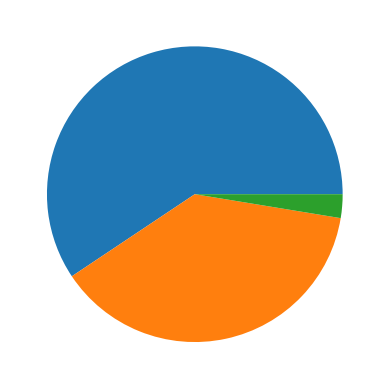

In [62]:
ahs_esc = ahs_merge.query("DIVISION == 'East South Central'")
plt.pie(ahs_esc['TENURE'].value_counts())

<function matplotlib.pyplot.show(close=None, block=None)>

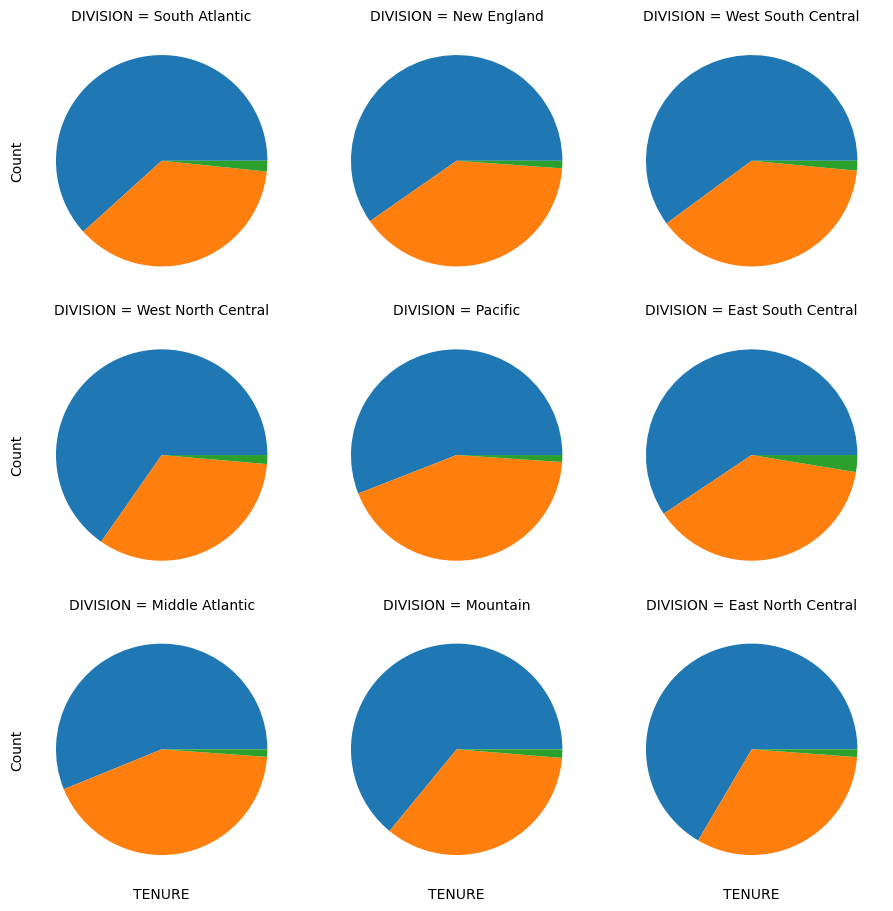

In [87]:
ahs_pie = ahs_merge.groupby(['DIVISION', 'TENURE']).size().reset_index(name='Count')

def plot_pie(data, **kwargs):
    data = data['TENURE'].value_counts()
    ax = plt.gca()
    ax.pie(data)
    ax.set_aspect('equal')

g = sns.FacetGrid(ahs_merge, col='DIVISION', col_wrap=3)
g.map_dataframe(plot_pie)
g.set_axis_labels('TENURE', 'Count')

plt.show

In [88]:
ahs_merge[['DIVISION', 'TENURE']]
ahs_merge['squat'] = ahs_merge['TENURE'] == 'Occupied without payment of rent'

<Axes: xlabel='squat', ylabel='DIVISION'>

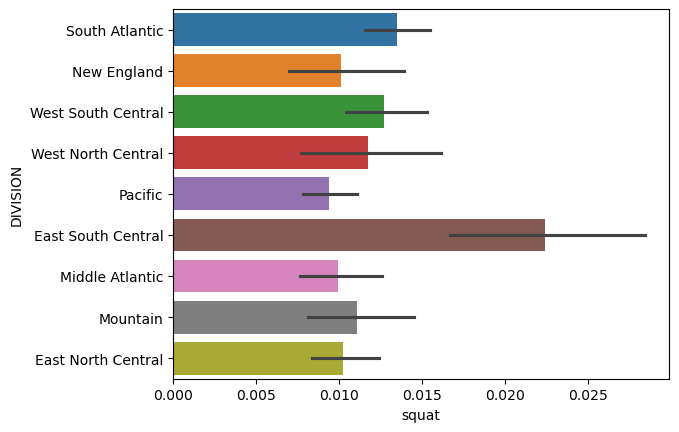

In [89]:
sns.barplot(ahs_merge, y='DIVISION', x='squat', hue='DIVISION')

# Increase in sq footage over time

/var/folders/c9/9dpn8j8s2cb5mjl9rjm_s0k00000gn/T/ipykernel_19181/2704362976.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ahs_merge['size'] = ahs_merge['UNITSIZE'].replace(replace_map)


<Axes: xlabel='YRBUILT', ylabel='size'>

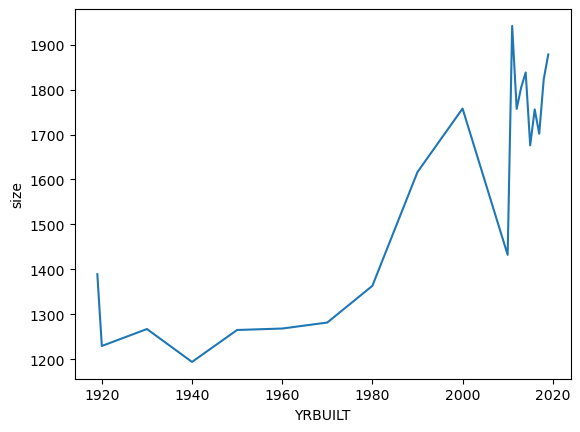

In [73]:
ahs_merge['UNITSIZE'].unique()
replace_map = {'2,000 to 2,499 square feet': 2000,
               '3,000 to 3,999 square feet': 3000,
               '750 to 999 square feet': 750, 
               '1,500 to 1,999 square feet': 1500,
               '500 to 749 square feet': 500, 
               '1,000 to 1,499 square feet': 1000, 
               'Less than 500 square feet': 0, 
               '4,000 square feet or more': 4000,
               '2,500 to 2,999 square feet': 2500}
ahs_merge['size'] = ahs_merge['UNITSIZE'].replace(replace_map)

ahs_line = ahs_merge.groupby(['YRBUILT']).agg({'size': 'mean'}).reset_index()
sns.lineplot(ahs_line, x='YRBUILT', y='size')

# comparison of women renters to other groups

In [78]:
ahs_merge[['HHSEX', 'HHRACE', 'TENURE', 'brokenness']]

HHSEX      HHRACE                                             TENURE  \
0        Male  White only  Owned or being bought by someone in your house...   
1      Female  White only  Owned or being bought by someone in your house...   
2         NaN         NaN                                                NaN   
3        Male  White only  Owned or being bought by someone in your house...   
4      Female  Black only                                             Rented   
...       ...         ...                                                ...   
63180    Male  White only  Owned or being bought by someone in your house...   
63181    Male  White only  Owned or being bought by someone in your house...   
63182  Female  White only  Owned or being bought by someone in your house...   
63183    Male  White only  Owned or being bought by someone in your house...   
63184  Female  White only  Owned or being bought by someone in your house...   

       brokenness  
0       -0.159316  
1       -0.159316  
2             NaN  
3       -0.073491  
4             NaN  
...           ...  
63180   -0.159316  
63181   -0.107032  
63182   -0.159316  
63183   -0.159316  
63184   -0.159316  

[63185 rows x 4 columns]

In [90]:
ahs_broke = ahs_merge.groupby(['HHSEX', 'HHRACE', 'TENURE']).agg({'brokenness': 'mean'}).reset_index()
ahs_broke

HHSEX                               HHRACE  \
0   Female  American Indian, Alaska Native only   
1   Female  American Indian, Alaska Native only   
2   Female  American Indian, Alaska Native only   
3   Female                           Asian only   
4   Female                           Asian only   
5   Female                           Asian only   
6   Female                           Black only   
7   Female                           Black only   
8   Female                           Black only   
9   Female                                Other   
10  Female                                Other   
11  Female                                Other   
12  Female                        White / Black   
13  Female                        White / Black   
14  Female                        White / Black   
15  Female                           White only   
16  Female                           White only   
17  Female                           White only   
18    Male  American Indian, Alaska Native only   
19    Male  American Indian, Alaska Native only   
20    Male  American Indian, Alaska Native only   
21    Male                           Asian only   
22    Male                           Asian only   
23    Male                           Asian only   
24    Male                           Black only   
25    Male                           Black only   
26    Male                           Black only   
27    Male                                Other   
28    Male                                Other   
29    Male                                Other   
30    Male                        White / Black   
31    Male                        White / Black   
32    Male                        White / Black   
33    Male                           White only   
34    Male                           White only   
35    Male                           White only   

                                               TENURE  brokenness  
0                    Occupied without payment of rent    0.394495  
1   Owned or being bought by someone in your house...    0.081094  
2                                              Rented    0.192015  
3                    Occupied without payment of rent   -0.117840  
4   Owned or being bought by someone in your house...   -0.069551  
5                                              Rented   -0.047984  
6                    Occupied without payment of rent    0.257862  
7   Owned or being bought by someone in your house...    0.041211  
8                                              Rented    0.134380  
9                    Occupied without payment of rent    0.034376  
10  Owned or being bought by someone in your house...    0.022001  
11                                             Rented    0.040968  
12                   Occupied without payment of rent         NaN  
13  Owned or being bought by someone in your house...    0.030709  
14                                             Rented    0.016041  
15                   Occupied without payment of rent    0.143418  
16  Owned or being bought by someone in your house...   -0.014752  
17                                             Rented    0.093284  
18                   Occupied without payment of rent   -0.083514  
19  Owned or being bought by someone in your house...    0.104686  
20                                             Rented    0.196903  
21                   Occupied without payment of rent   -0.086701  
22  Owned or being bought by someone in your house...   -0.072029  
23                                             Rented   -0.039584  
24                   Occupied without payment of rent    0.192499  
25  Owned or being bought by someone in your house...    0.026872  
26                                             Rented    0.112351  
27                   Occupied without payment of rent    0.547953  
28  Owned or being bought by someone in your house...   -0.013121  
29                                             Rented    0.087934  
30       

<Axes: xlabel='brokenness', ylabel='TENURE'>

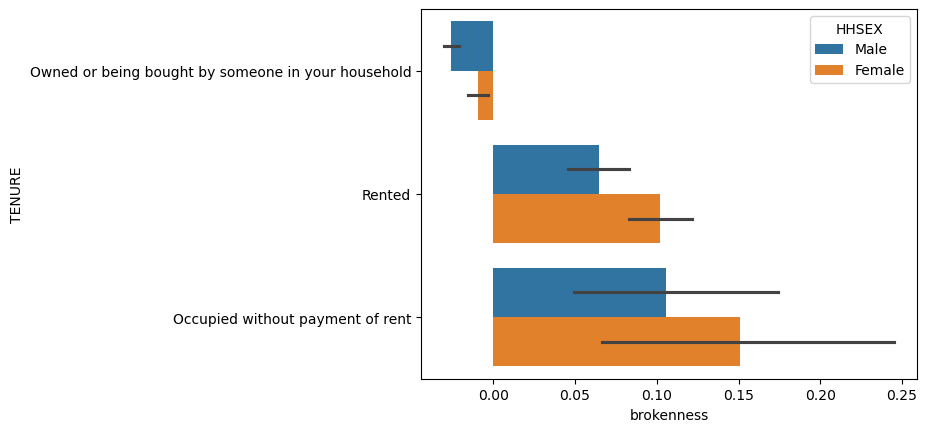

In [81]:
sns.barplot(ahs_merge, y='TENURE', x='brokenness', hue='HHSEX')

In [82]:
ahs_merge['HHRACE'].unique()

array(['White only', nan, 'Black only',
       'American Indian, Alaska Native only', 'Asian only', 'Other',
       'White / Black'], dtype=object)

In [96]:
replace_map = {'Black only': 'Not white only',
               'American Indian, Alaska Native only': 'Not white only', 
               'Asian only': 'Not white only', 
               'Other': 'Not white only',
               'White / Black': 'Not white only'}
ahs_merge['white'] = ahs_merge['HHRACE'].replace(replace_map)

/usr/local/Caskroom/miniconda/base/envs/db_env/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/Caskroom/miniconda/base/envs/db_env/lib/python3.12/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/Caskroom/miniconda/base/envs/db_env/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/Caskroom/miniconda/base/envs/db_env/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the 

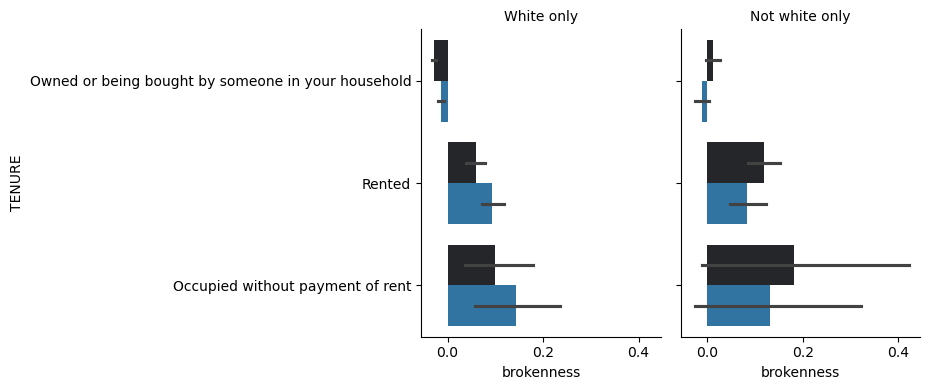

In [97]:
g = sns.FacetGrid(ahs_merge, col='white', col_wrap=3, height=4, aspect=1)
g.map(sns.barplot, 'brokenness', 'TENURE', 'HHSEX')
g.set_titles('{col_name}')